<a href="https://colab.research.google.com/github/Jaspinder26/Heart-and-Diabetes-Disease-Detection/blob/main/FeaturesImportanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Ranked list of features by importance:
           Feature  Importances
10        ST_Slope     0.215349
2    ChestPainType     0.128662
7            MaxHR     0.109796
9          Oldpeak     0.108962
4      Cholesterol     0.108190
0              Age     0.082459
8   ExerciseAngina     0.082186
3        RestingBP     0.072513
1              Sex     0.035859
6       RestingECG     0.028894
5        FastingBS     0.027131


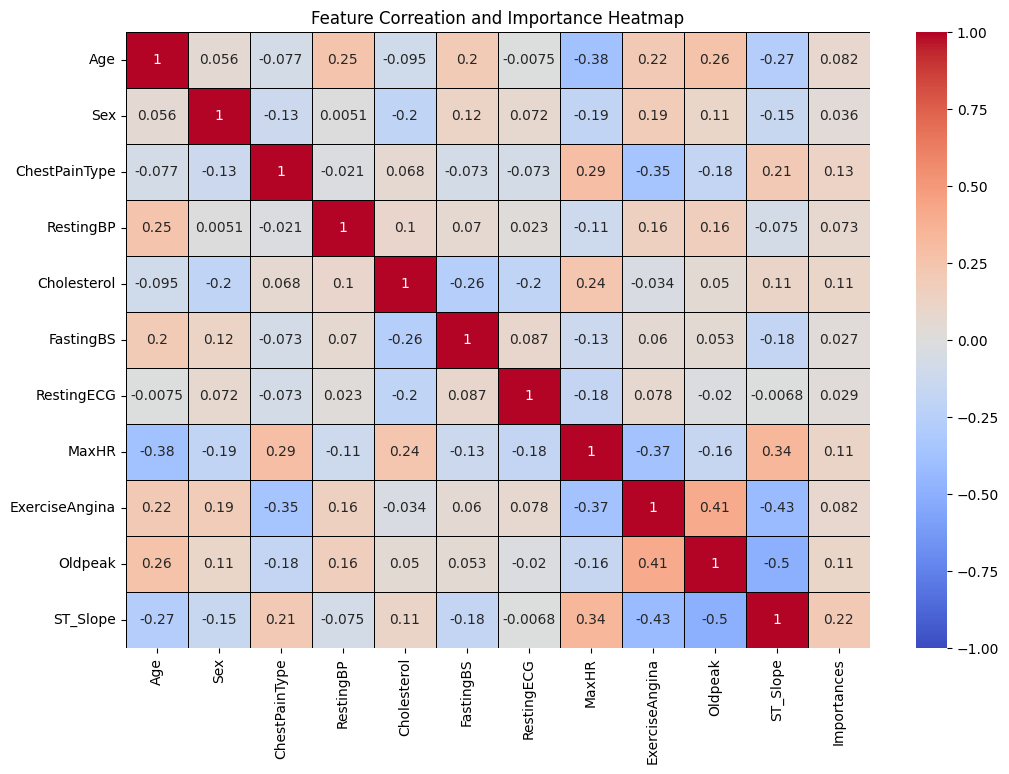

In [ ]:
label_encoder=LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])
data['ChestPainType']=label_encoder.fit_transform(data['ChestPainType'])
data['RestingECG']=label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina']=label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope']=label_encoder.fit_transform(data['ST_Slope'])
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X,y)
feature_importances=rf_classifier.feature_importances_
feature_importances_df=pd.DataFrame({'Feature':X.columns, 'Importances':feature_importances})
feature_importances_df=feature_importances_df.sort_values(by='Importances',ascending=False)
print('Ranked list of features by importance:')
print(feature_importances_df)
corr_matrix=X.corr()
importances_matrix=pd.DataFrame(corr_matrix)
importances_matrix['Importances']=feature_importances

plt.figure(figsize=(12,8))
sns.heatmap(importances_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,linewidth=0.5,linecolor="black" )
plt.title('Feature Correation and Importance Heatmap')
plt.show()
